<a href="https://colab.research.google.com/github/PrachiKhatri22/Human-Activity-Recognition-HAR-Image-Classification-Using-PyTorch-ANN/blob/main/HAR_Image_Classification_Using_PyTorch_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install split-folders

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from torchsummary import summary
# import splitfolders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
# style.use('dark_background')

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
# Resize images to 64x64
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Humber Sem-2/Image Processing/Assig06

/content/drive/MyDrive/Humber Sem-2/Image Processing/Assig06


# Split the folder into train and test and Prepare train and test datasets, Loaders


In [ ]:
# splitfolders.ratio("Circle_Cross", output="output",
#     seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Copying files: 2001 files [17:30,  1.90 files/s]


In [ ]:
train_data = datasets.ImageFolder('TrainTest/train', transform = transform)
test_data = datasets.ImageFolder('TrainTest/val', transform = transform)

In [ ]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size = 32, shuffle=True,  drop_last = True)
test_loader = DataLoader(test_data, batch_size= 32,  drop_last = True)

class_names = train_data.classes # classes or labels or categories

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['Catch', 'Clap', 'Hammering']
Training images available: 4044
Testing images available:  1013


## Display a batch of images

In [ ]:
for images,labels in train_loader:
    break
images.shape



torch.Size([32, 3, 64, 64])

In [ ]:
labels

tensor([1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 2, 2, 0, 2])

In [ ]:
#np.transpose(im.numpy(), (1, 2, 0)).shape

Label: [1 2 1 1 2 1 2 2 0 0 2 2 1 0 0 1 2 2 1 1 1 1 0 1 1 0 0 0 2 2 0 2]
Class: Clap Hammering Clap Clap Hammering Clap Hammering Hammering Catch Catch Hammering Hammering Clap Catch Catch Clap Hammering Hammering Clap Clap Clap Clap Catch Clap Clap Catch Catch Catch Hammering Hammering Catch Hammering


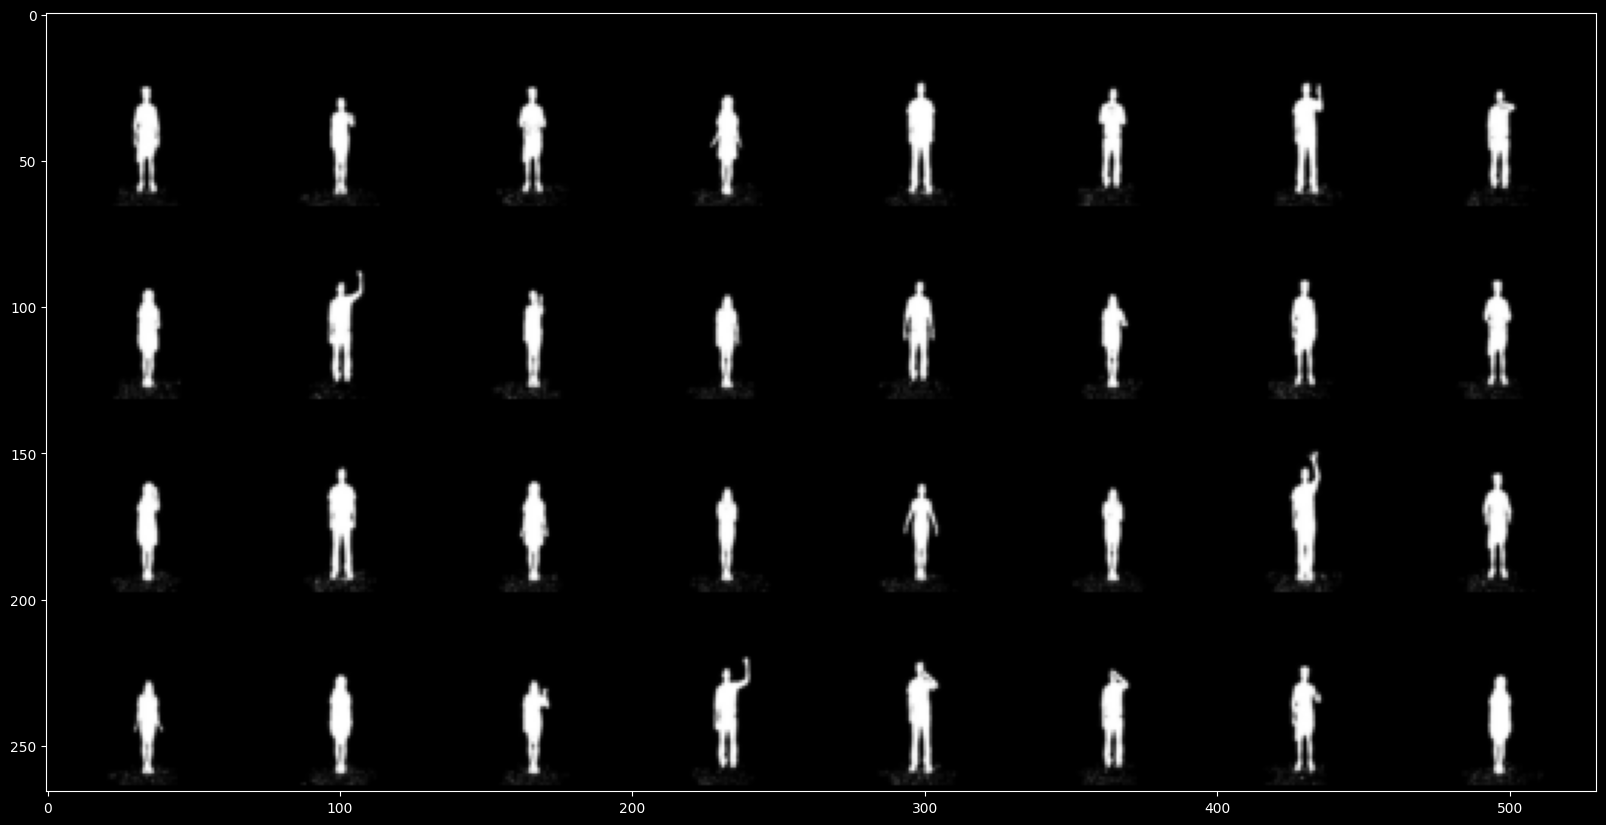

In [ ]:
# Print the labels

print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images)


# Print the images

plt.figure(figsize=(20,16))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
class EarlyStoppingCriterion():
    def __init__(self, patience = 3, delta = 0,  trace_func = print):

        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.trace_func = trace_func

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score

        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

# Create the model

In [ ]:
class NN_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(64*64*3, 1024)

        # Hidden Layers

        self.fc1 = nn.Linear(1024, 512)
        self.bnorm1 = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(512, 256)
        self.bnorm2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(256, 128)
        self.bnorm3 = nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(128, 64)
        self.bnorm4 = nn.BatchNorm1d(128)
        #self.fc5 = nn.Linear(256, 128)
        #self.bnorm5 = nn.BatchNorm1d(256)
        #self.fc6 = nn.Linear(128, 64)
        #self.bnorm6 = nn.BatchNorm1d(128)


       # Output Layers

        self.output = nn.Linear(64, 3)

    def forward(self,x):

    # Pass the data through the input layer
        x = x.view(x.shape[0], -1)
        x = self.input(x)
        x = F.relu(x)
        x = self.bnorm1(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.bnorm2(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.bnorm3(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.bnorm4(x)
        x = self.fc4(x)
        x = F.relu(x)
        #x = self.bnorm5(x)
        #x = self.fc5(x)
        #x = F.relu(x)
        #x = self.bnorm6(x)
        #x = self.fc6(x)
        #x = F.relu(x)

        # output layer

        x = self.output(x)
        # X = torch.sigmoid
        return x

model = NN_Classifier()
model.to(device)

NN_Classifier(
  (input): Linear(in_features=12288, out_features=1024, bias=True)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (bnorm1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bnorm2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bnorm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (bnorm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output): Linear(in_features=64, out_features=3, bias=True)
)

# Train and Test the model

In [ ]:
# Define early stopping parameters
patience = 3  # Number of epochs to wait if no improvement
min_delta = 0  # Minimum change in validation loss or accuracy to be considered an improvement
best_loss = float('inf')
best_epoch = 0
no_improvement_counter = 0

epochs = 10

# loss function
lossfunc = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)

# Initialize losses and Accuracies
losses = torch.zeros(epochs)
trainAcc = []
testAcc = []

# Initialize early stopping criterion
early_stopping = EarlyStoppingCriterion(patience=patience, delta=min_delta)

# Training loop with early stopping
for epoch in range(epochs):
    model.train()
    batchAcc = []
    batchLoss = []

    for X, y in train_loader:
        X = X.to(device)
        X = X.to(device)
        y = y.to(device)
        ypred = model(X)
        loss = lossfunc(ypred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batchLoss.append(loss.item())
        ypred = ypred.cpu()
        y = y.cpu()
        acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
        batchAcc.append(acc)

    trainAcc.append(np.mean(batchAcc))
    losses[epoch] = np.mean(batchLoss)

    # Validation step
    model.eval()
    with torch.no_grad():
        X, y = next(iter(test_loader))
        X = X.to(device)
        y = y.to(device)
        ypred = model(X)
        ypred = ypred.cpu()
        y = y.cpu()
        test_accuracy = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
        testAcc.append(test_accuracy)

        val_loss = lossfunc(ypred, y).item()

        # Check for improvement
        if val_loss < best_loss - min_delta:
            best_loss = val_loss
            best_epoch = epoch
            no_improvement_counter = 0
        else:
            no_improvement_counter += 1

        # Check if early stopping criteria are met
        if no_improvement_counter >= patience:
            print(f'Early stopping at epoch {epoch} as no improvement was seen in validation loss.')
            break

        # Call early stopping criterion
        early_stopping(val_loss, model)

        # Check if early stopping criterion is met
        if early_stopping.early_stop:
            print("Early stopping")
            break

    print(f'Epoch {epoch}: Training Loss: {losses[epoch]:.4f}, Training Accuracy: {trainAcc[epoch]:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

# After the loop ends, you can use the model from the best_epoch if needed
print(f'Best epoch: {best_epoch}, Best validation loss: {best_loss:.4f}')

Epoch 0: Training Loss: 0.4330, Training Accuracy: 81.97%, Test Accuracy: 37.50%
Epoch 1: Training Loss: 0.2052, Training Accuracy: 92.53%, Test Accuracy: 100.00%
EarlyStopping counter: 1 out of 3
Epoch 2: Training Loss: 0.1340, Training Accuracy: 95.01%, Test Accuracy: 100.00%
EarlyStopping counter: 2 out of 3
Epoch 3: Training Loss: 0.1229, Training Accuracy: 95.63%, Test Accuracy: 100.00%
Early stopping at epoch 4 as no improvement was seen in validation loss.
Best epoch: 1, Best validation loss: 0.0151


# Plotting and Visualizing the performance

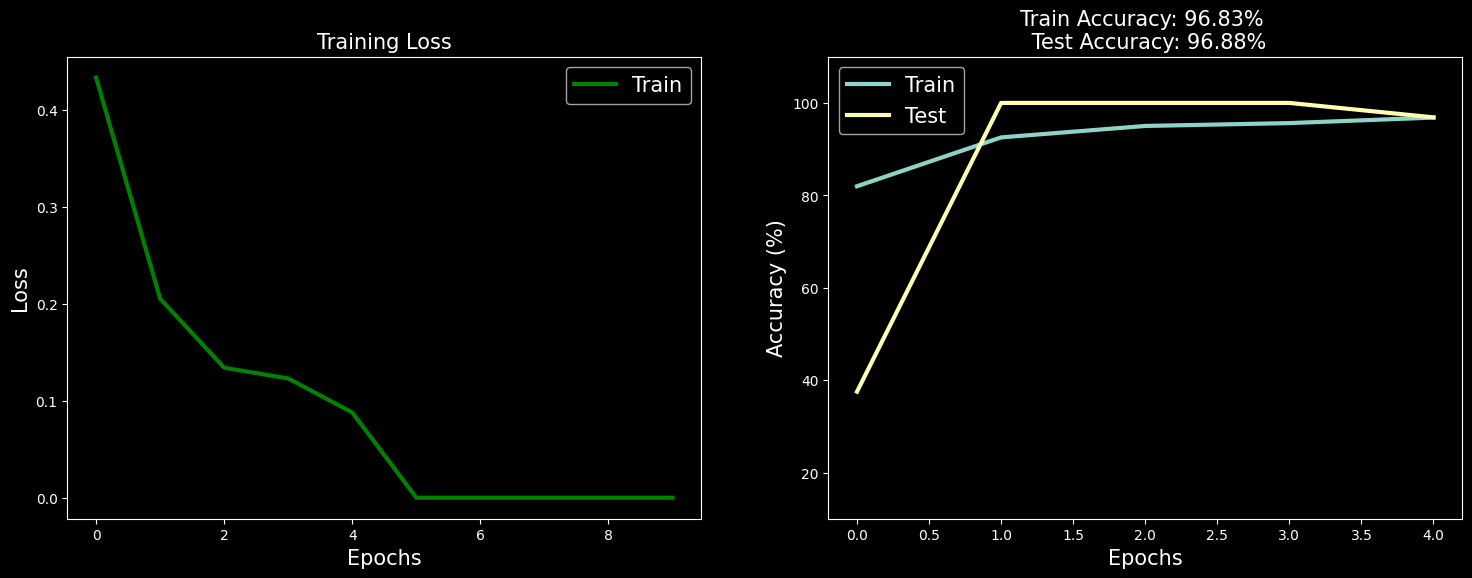

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(losses, 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)

ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()